In [1]:
import sympy as sy
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### Quantum Particle in a Triangular Well
The problem of a particle in a triangular well is of particular relevance for the field of Solid State Physics, in the study of semiconducting structures such as high-electron-mobility transistors (HEMTs)

![HEMT Band Structure](./images/HEMT-band_structure_scheme-en.png)

*Figure: Band structure of a High-Electron-Mobility Transistor. Image by [Tschubby](https://commons.wikimedia.org/wiki/User:Tschubby), licensed under [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/).*


We are interested in solving the 1D Schrödinger equation in the GaAs region, whose wavefunction solutions provide the quantized energy levels and spatial distribution of conduction electrons.
Mathematically, the potential profile in this region can be approximated as a triangular well. In the region of interest, we are interested in solving the following Schrödinger Equation:

$\left[ - \frac{\hbar^2}{2m^{*}} \frac{d^2}{dx^2} + eFx\right] \psi(x) = E \psi(x)$

where $m^{*}$ is the effective mass of electrons in GaAs ($\approx 0.063 m_e$), and F is the electric field strength due to charge transfer. We will find that the solutions are given in terms of Airy functions, which describe the behavior of electrons in a linearly varying potential.

In [2]:
# importing the relevant constants
from scipy.constants import m_e, e, hbar

## Mathematical formulation
We consider the Hamiltonian $\hat{\mathcal{H}}$ of a particle confined within inside a triangular potential well. This Hamiltonian is given by

$\hat{\mathcal{H}} = \frac{1}{2 m_e} \hat{p}_x^2 + V(x)$


where the potential is given by

$
V(x) =
\begin{cases}
\infty, & x < 0 \\
eFx, & x \geq 0
\end{cases}
$


## Analytical solution
In the region of interest $x>0$, we have the following Schrödinger's equation:

$\left[ - \frac{\hbar^2}{2m^{*}} \frac{d^2}{dx^2} + eFx\right] \psi(x) = E \psi(x)$

In order to adimentionalize the problem, we note we have the following dimensional connections between the terms of the Hamiltonian

$ \frac{\hbar^2}{2m^{*}} \frac{d^2}{dx^2} \sim \frac{\hbar^2}{2m^{*} x^2}$

$\frac{\hbar^2}{2m^{*} x^2} \sim e F x$

We therefore propose a length scale $x_0$, which we derive from matching both terms in the equality for that particular $x$.

$\frac{\hbar^2}{2m^{*} x_{0}^{2}} = e F x_0$

Solving for $x_0$ we find $x_0 = \left( \frac{\hbar^2}{2 m_e e F} \right)^{1/3}$. We then define the adimensional variable $\xi = \frac{x}{x_0}$, which means $x = x_0 \xi$ and therefore our wavefunction reads $\psi(x_0 \xi)$.

We now use the chain rule to express the equation in our adimensional variable.

$\frac{d \psi}{d x} = \frac{d \xi}{d x} \frac{d \psi}{d \xi} = \frac{1}{x_0} \frac{d \psi}{d \xi}$



$\frac{d^2 \psi}{d x^2} = \frac{d}{d x} \left( \frac{d \psi}{d x} \right) = \frac{d}{d x} \left( \frac{1}{x_0} \frac{d \psi}{d \xi} \right) = \frac{1}{x_0} \frac{d}{d \xi} \left( \frac{d \psi}{d x} \right) = \frac{1}{x_0^2} \frac{d^2 \psi}{d \xi^2}$

Substituting back into Schrödinger's equation we get

$\left[ - \frac{\hbar^2}{2m^{*}x_0^2} \frac{d^2}{d \xi^2} + eF\left(x_0 \xi \right)  \right] \psi(\xi) = E \psi(\xi)$

We remember we defined $x_0$ in such a way we guaranteed the first terms had equal coefficients. With that we multiply the whole equation by $-\frac{2 m^{*} x_{0}^{2}}{\hbar^2}$ and get

$\left[\frac{d^2}{d \xi^2} - \xi \right] \psi(\xi) = - \frac{2 m^{*} x_{0}^{2} E}{\hbar^2} \psi(\xi)$

We now define again an adimensional energy $\epsilon = \frac{2 m^{*} x_{0}^{2} E}{\hbar^2}$. Now, forming the Airy equation, we get the following:

$\left[\frac{d^2}{d \xi^2} - (\xi - \epsilon) \right] \psi(\xi) = 0$

which is precisely the Airy equation, if we do a final linear substitution $y = \xi - \epsilon$ (since the substitution is linear the derivatives do not change)

$\left[\frac{d^2}{d y^2} - y \right] \psi(y) = 0$

![Airy Functions](./images/Airy_Functions.png)

*Figure: A graph of the Airy functions, Ai(x) and Bi(x) over x=(-15,5). Image by [InductiveLoad](https://en.wikipedia.org/wiki/User:Inductiveload), licensed under [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/).*


In [3]:
# Field strength: 10^7 V/m, realistic value in the context of a HEMT 
F = 1e7
m_eff = 0.063 * m_e  # Effective mass of the electron in GaAs
x0 = ((hbar ** 2) / (2 * m_eff * e * F)) ** (1/3)
x0

3.925191013585428e-09

The characteristic length for this system is $x_0 \approx 3.9 \text{nm}$

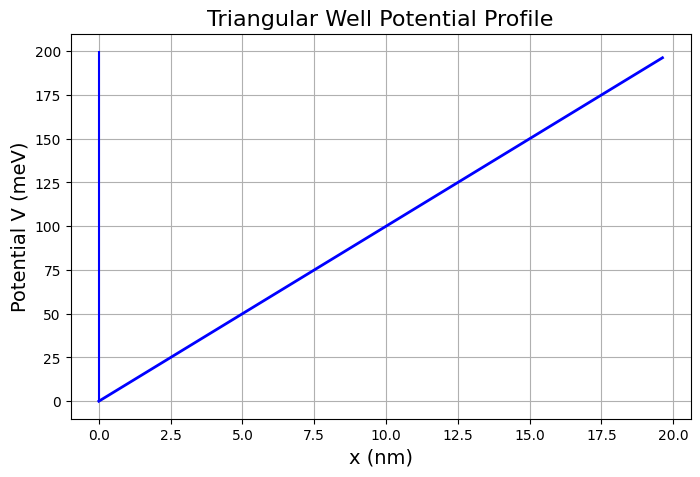

In [5]:
# Create an array for x from 0 to 5*x0 (in meters)
x = np.linspace(0, 5 * x0, 500)

# Calculate the potential V(x) in Joules
V = e * F * x

# Convert potential from Joules to meV:
# 1 eV = 1.602e-19 J, so V (in eV) = V / e, then multiply by 1000 for meV.
V_meV = V / e * 1e3

# Convert x from meters to nanometers (1 m = 1e9 nm)
x_nm = x * 1e9

# Plot the potential profile
plt.figure(figsize=(8, 5))
plt.plot(x_nm, V_meV, 'b-', lw=2)
plt.xlabel("x (nm)", fontsize=14)
plt.ylabel("Potential V (meV)", fontsize=14)
plt.vlines(0, 0, 200, colors='b')
plt.title("Triangular Well Potential Profile", fontsize=16)
plt.grid(True)
plt.show()

In [6]:
from scipy.special import airy
from scipy.special import ai_zeros

The most general solution to this equation is given by a linear combination of the two Airy functions $\text{Ai}(y)$ and $\text{Bi}(y)$

$\psi(y) = C_n \text{Ai}(y) +  D_n \text{Bi}(y)$

However, only $\text{Ai}(y)$ is bounded for our case when we consider $x \to \infty$, which means $D_n = 0$. Now we go back to our original variable $x$ in order to apply the boundary condition at the infinite potential.

$y = \xi - \epsilon = \frac{x}{x_0} - \epsilon$ $\to$ $\psi(y) = \psi(\frac{x}{x_0} - \epsilon) = C_n \text{Ai}(\frac{x}{x_0} - \epsilon)$

Now we can impose the boundary condition $\psi(x=0) = 0$, which leads us to the following

$\psi(x=0) = C_n \text{Ai}(- \epsilon_n) = 0$

Notice we now introduce the subscript $n$ to $\epsilon_n$, since these energies correspond precisely to multiple zeros of the first Airy function (with a positive sign), giving us our quantization constraints.

In [7]:
zeros = ai_zeros(10)[0]
for zero in zeros:
    print(float(zero))

-2.3381074104597674
-4.08794944413097
-5.520559828095515
-6.786708090071912
-7.944133587112781
-9.022650853340979
-10.040174341558087
-11.008524303733262
-11.936015563236262
-12.828776752865757


| Zero Index (n) | Zero Value ($\epsilon_n$) |
|----------------|-----------------|
| 0              | 2.3381074104597674 |
| 1              | 4.08794944413097    |
| 2              | 5.520559828095515   |
| 3              | 6.786708090071912   |
| 4              | 7.944133587112781   |
| 5              | 9.022650853340979   |
| 6              | 10.040174341558087  |
| 7              | 11.008524303733262  |
| 8              | 11.936015563236262  |
| 9              | 12.828776752865757  |


Using the notation for the adimensional energy we introduced earlier, we identify each $\epsilon_n$ with the $n$-th zero of the Airy function. The constant $C_n$ can be determined by numerical integration of each squared wavefunction from $0$ to $\infty$. Then the wavefunctions are

$\psi_n(x) = C_n \text{Ai}(\frac{x}{x_0} - \epsilon_n)$


With the knowledge that the $\epsilon_n$ correspond to the Airy zeros, we can now solve for the energies which we had rewritten using the relation $\epsilon_n = \frac{2 m^{*} x_{0}^{2} E}{\hbar^2}$

$E_n = \frac{\hbar^2 }{2m^{*} x_0^2} \epsilon_n$

In [8]:
# calculate the first 10 energy levels in meV and save them into an array
energies = []
scaling = - (hbar ** 2) / (2 * m_eff * x0**2)
for n, zero in enumerate(zeros):
    E_n = scaling * zero
    E_n_meV = (E_n / e) * 1e3  # Convert to meV
    energies.append(E_n_meV)
    print(f"Energy level {n}: {E_n_meV:.4f} meV")

energies = np.array(energies)

Energy level 0: 91.7752 meV
Energy level 1: 160.4598 meV
Energy level 2: 216.6925 meV
Energy level 3: 266.3913 meV
Energy level 4: 311.8224 meV
Energy level 5: 354.1563 meV
Energy level 6: 394.0960 meV
Energy level 7: 432.1056 meV
Energy level 8: 468.5114 meV
Energy level 9: 503.5540 meV


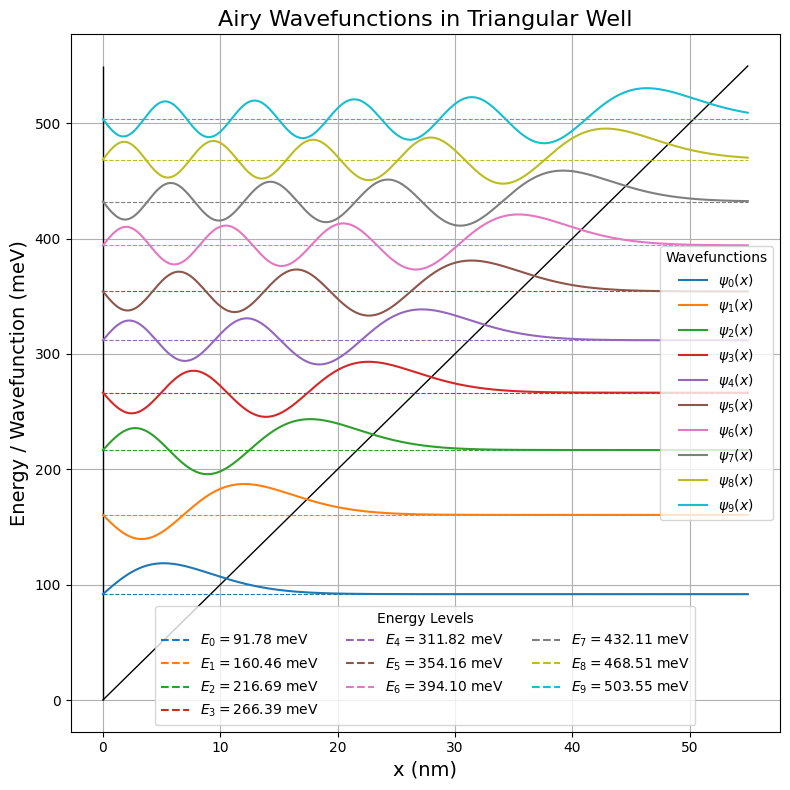

In [10]:
from sympy.abc import xi

# Spatial domain
x = np.linspace(0, 14 * x0, 1000)
xi_vals = x / x0
x_nm = x * 1e9  # For plotting in nm

# Potential profile V(x) = e F x in meV
V = e * F * x
V_meV = V / e * 1e3

# Plot setup
plt.figure(figsize=(8, 8))
plt.plot(x_nm, V_meV, 'k-', lw=1, label="Potential $V(x)$")
# Horizontal line at x = 0 (vertical axis)
plt.vlines(0, 0, np.max(V_meV), colors='k', linewidth=1)

wavefunction_handles = []
energy_handles = []

for n, epsilon_n in enumerate(zeros):
    # Define psi_n(x) = Ai(x / x0 - ε_n)
    psi_expr = sy.functions.special.bessel.airyai(xi + float(epsilon_n))
    psi_lambda = sy.lambdify(xi, psi_expr)
    psi_vals = psi_lambda(xi_vals)

    # Visually scale wavefunction
    psi_vals *= 50

    # Energy level in meV
    E_meV = energies[n]

    # Shift wavefunction
    psi_shifted = psi_vals + E_meV

    # Plot wavefunction
    wf_line, = plt.plot(x_nm, psi_shifted, lw=1.5, label=fr"$\psi_{{{n}}}(x)$")
    wavefunction_handles.append(wf_line)

    # Dashed horizontal line at energy level
    e_line = plt.hlines(E_meV, x_nm[0], x_nm[-1], colors=[wf_line.get_color()],
                        linestyles='dashed', linewidth=0.8)
    # Create a proxy handle for legend
    energy_handles.append(plt.Line2D([], [], color=wf_line.get_color(), linestyle='--',
                                     label=fr"$E_{{{n}}} = {E_meV:.2f}~\mathrm{{meV}}$"))


# Plot aesthetics
plt.xlabel("x (nm)", fontsize=14)
plt.ylabel("Energy / Wavefunction (meV)", fontsize=14)
plt.title("Airy Wavefunctions in Triangular Well", fontsize=16)
plt.grid(True)

# Two separate legends
first_legend = plt.legend(
    handles=energy_handles,
    loc="lower center",
    ncol=len(energy_handles) / 3,
    fontsize=10,
    title="Energy Levels"
)

plt.gca().add_artist(first_legend)  # Keep first legend when adding the second

plt.legend(handles=wavefunction_handles, loc="center right", fontsize=10, title="Wavefunctions")

plt.tight_layout()
plt.show()

### Perturbation Theory
As we could see in the conduction band graph of the HEMT, the potential is not perfectly linear, but rather tapers off. In order to properly calculate the energy levels of each state, we apply time independent perturbation theory, with a perturbative potential $V'(x) \sim - \alpha \tanh{x}$, where $\alpha \ll 1$ is small relative to the energy levels. In this case, we take $\alpha = 5 \ \text{meV}$, because the energies are in the order of $90$ to $500 \ \text{meV}$

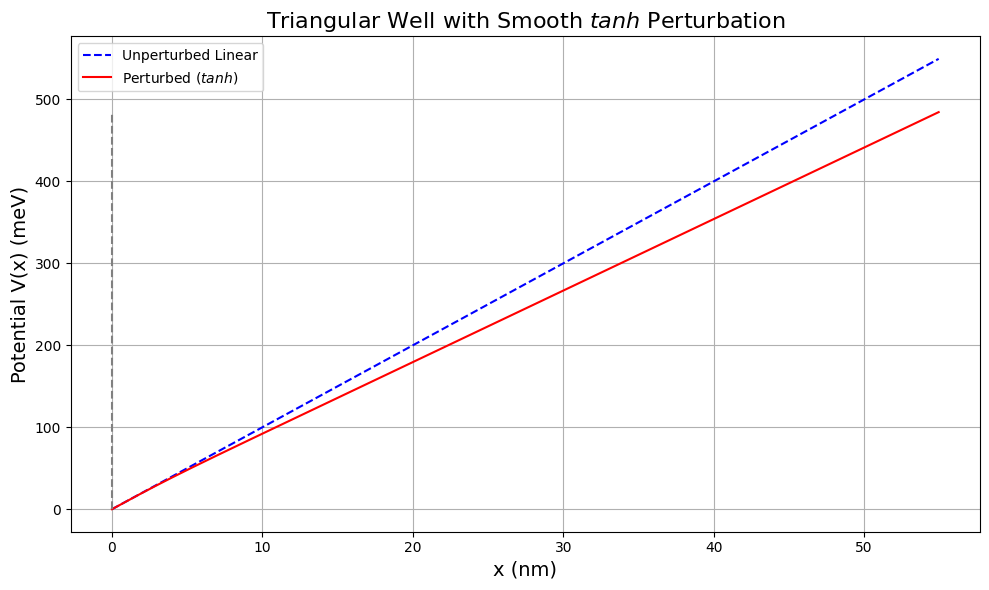

In [11]:
# Domain
x = np.linspace(0, 14 * x0, 500)
x_nm = x * 1e9  # for plotting in nm

# Unperturbed potential V0 = e F x (in Joules)
V0 = e * F * x

# Full tanh perturbation (in J)
alpha = 0.005 * e  # max ~5 meV
z = x / x0

# Perturbation: remove linear term to make it a true perturbation
V_pert = alpha * (np.tanh(z) - z)

# Total potential (in meV)
V_total = (V0 + V_pert) / e * 1e3
V_linear = V0 / e * 1e3

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_nm, V_linear, '--', color='blue', label='Unperturbed Linear')
plt.plot(x_nm, V_total, color='red', label=r'Perturbed ($tanh$)')

plt.xlabel("x (nm)", fontsize=14)
plt.ylabel("Potential V(x) (meV)", fontsize=14)
plt.title(r"Triangular Well with Smooth $tanh$ Perturbation", fontsize=16)
plt.grid(True)
plt.vlines(0, 0, np.max(V_total), colors='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


Since the expression for the first correction of the energy involves the normalized wavefunction, we estimate the normalization coefficient with scipy's ```quad``` function

$$
\Delta E_n^{(1)} = \langle \psi_n^{(0)} | \hat{W} | \psi_n^{(0)} \rangle = \int_{0}^{\infty} \psi_n^{(0)}(x)^2 W(x) \, dx
$$


In [12]:
from scipy.integrate import quad
from scipy.special import airy, ai_zeros

# Define zeros of the Airy function if not already defined
zeros = ai_zeros(10)[0]

normalization_constants = []

for n, epsilon_n in enumerate(zeros):
    def psi_squared(xi_val):
        return airy(xi_val + epsilon_n)[0]**2  # Only the Ai function

    norm_sq, _ = quad(psi_squared, 0, 15)
    norm = np.sqrt(norm_sq)
    normalization_constants.append(norm)

    print(f"n = {n}, Normalized coefficient ≈ {(1/norm):.4f}")


n = 0, Normalized coefficient ≈ 1.4261
n = 1, Normalized coefficient ≈ 1.2452
n = 2, Normalized coefficient ≈ 1.1558
n = 3, Normalized coefficient ≈ 1.0979
n = 4, Normalized coefficient ≈ 1.0556
n = 5, Normalized coefficient ≈ 1.0226
n = 6, Normalized coefficient ≈ 0.9956
n = 7, Normalized coefficient ≈ 0.9730
n = 8, Normalized coefficient ≈ 0.9535
n = 9, Normalized coefficient ≈ 0.9366


In [13]:
from scipy.constants import e

alpha = 0.005 * e  # 5 meV
V_perturb = alpha * (np.tanh(xi_vals) - xi_vals)
V_pert_xi = np.interp(xi_vals, xi_vals, V_perturb)  # convert to function of ξ


from scipy.integrate import quad
from scipy.special import airy

energy_corrections = []

print("Energy Corrections due to small perturbation:")

for n, epsilon_n in enumerate(zeros):
    norm_n = normalization_constants[n]

    def integrand(xi):
        psi_sq = airy(xi + epsilon_n)[0]**2
        V = np.interp(xi, xi_vals, V_pert_xi)
        return (psi_sq / norm_n**2) * V  # Properly normalized

    delta_E, _ = quad(integrand, 0, 14)
    energy_corrections.append(delta_E / e * 1e3)  # Convert J → meV

    print(f"ΔE_{n} ≈ {energy_corrections[-1]:.4f} meV")


Energy Corrections due to small perturbation:
ΔE_0 ≈ -3.5651 meV
ΔE_1 ≈ -9.0529 meV
ΔE_2 ≈ -13.7157 meV
ΔE_3 ≈ -17.8773 meV
ΔE_4 ≈ -21.6981 meV
ΔE_5 ≈ -25.2671 meV
ΔE_6 ≈ -28.6394 meV
ΔE_7 ≈ -31.8513 meV
ΔE_8 ≈ -34.9132 meV
ΔE_9 ≈ -37.6439 meV


We can see that the biggest shifts correspond to the higher energy levels, given that their wavefunctions experiment more of the perturbation. With that we find the following corrected energy levels

In [14]:
print("Corrected energy levels")
for n, epsilon_n in enumerate(zeros):
    E_n = energies[n]
    delta_E = energy_corrections[n]
    E_n_perturbed = E_n + delta_E
    print(f"E_{n} ≈ {E_n_perturbed:.4f} meV")

Corrected energy levels
E_0 ≈ 88.2101 meV
E_1 ≈ 151.4069 meV
E_2 ≈ 202.9768 meV
E_3 ≈ 248.5140 meV
E_4 ≈ 290.1243 meV
E_5 ≈ 328.8892 meV
E_6 ≈ 365.4567 meV
E_7 ≈ 400.2543 meV
E_8 ≈ 433.5982 meV
E_9 ≈ 465.9101 meV


### Conclusions

In this project, we computed the first 10 wavefunctions and energies for an electron in a triangular quantum well using Airy functions. We then applied a smooth perturbation modeled by a scaled $\tanh$ function and calculated first-order energy corrections using perturbation theory.

This is significant for semiconductor device physics:  
- In **quantum wells**, **transistors**, and **nanostructures**, the **lowest conduction subband** is the most populated due to Fermi-Dirac statistics.
- The first wavefunction $\psi_0(x)$ governs the **spatial distribution** of electrons and affects **conduction**, **optical transitions**, and **switching behavior**.

Thus, understanding and controlling $E_0$ is essential for **device design and tuning**, and this model provides a framework for doing so analytically and numerically.
